In [1]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the produce dataset
a = pd.read_csv('produce_dataset_segments.csv')
a.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,produce_item_flag,organic_item_flag,cust_total_produce_purchased,cust_organic_produce_purchased,organic_%,segment
0,0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,5,3,0.6,Moderate Organic
1,1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,5,3,0.6,Moderate Organic
2,2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,5,3,0.6,Moderate Organic
3,3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,5,3,0.6,Moderate Organic
4,4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,5,3,0.6,Moderate Organic


In [3]:
# This returns a df with user_id, segment
by_user_id = a.groupby('user_id')[['segment']].first().reset_index()
by_user_id

,user_id,segment
0,1,Moderate Organic
1,2,Organic Taster
2,3,Moderate Organic
3,4,Super Organic
4,5,Moderate Organic
...,...,...
194326,206205,Moderate Organic
194327,206206,Moderate Organic
194328,206207,Super Organic
194329,206208,Moderate Organic


In [4]:
# Read in the complete dataset
b = pd.read_csv('complete_dataset.csv')
b.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,0,77,soft drinks,7,beverages
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,0,91,soy lactosefree,16,dairy eggs
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,0,23,popcorn jerky,19,snacks
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,0,23,popcorn jerky,19,snacks
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,0,54,paper goods,17,household


In [5]:
# Initialize a item purchased flag column with all 1's, will use this to sum the total items purchased by segment
b['item_purchased_flag'] = 1
b.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department,item_purchased_flag
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,0,77,soft drinks,7,beverages,1
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,0,91,soy lactosefree,16,dairy eggs,1
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,0,23,popcorn jerky,19,snacks,1
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,0,23,popcorn jerky,19,snacks,1
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,0,54,paper goods,17,household,1


In [6]:
# merge complete dataset called b (that has all purchases) with by_user_id that has user defined segment for each user_id
c = pd.merge(b, by_user_id, how='left', left_on = 'user_id', right_on = 'user_id')
c

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department,item_purchased_flag,segment
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,0,77,soft drinks,7,beverages,1,Moderate Organic
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,0,91,soy lactosefree,16,dairy eggs,1,Moderate Organic
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,0,23,popcorn jerky,19,snacks,1,Moderate Organic
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,0,23,popcorn jerky,19,snacks,1,Moderate Organic
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,0,54,paper goods,17,household,1,Moderate Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,32545756,206209,14,272231,6,14,30.0,40603,Fabric Softener Sheets,4,0,75,laundry,17,household,1,Organic Taster
33819102,32545757,206209,14,272231,6,14,30.0,15655,Dark Chocolate Mint Snacking Chocolate,5,0,45,candy chocolate,19,snacks,1,Organic Taster
33819103,32545758,206209,14,272231,6,14,30.0,42606,Phish Food Frozen Yogurt,6,0,37,ice cream ice,1,frozen,1,Organic Taster
33819104,32545759,206209,14,272231,6,14,30.0,37966,French Baguette Bread,7,0,112,bread,3,bakery,1,Organic Taster


In [7]:
c = c.drop(['department_id', 'aisle_id', 'reordered'], axis=1)
c

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,aisle,department,item_purchased_flag,segment
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,soft drinks,beverages,1,Moderate Organic
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,soy lactosefree,dairy eggs,1,Moderate Organic
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,popcorn jerky,snacks,1,Moderate Organic
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,popcorn jerky,snacks,1,Moderate Organic
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,paper goods,household,1,Moderate Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,32545756,206209,14,272231,6,14,30.0,40603,Fabric Softener Sheets,4,laundry,household,1,Organic Taster
33819102,32545757,206209,14,272231,6,14,30.0,15655,Dark Chocolate Mint Snacking Chocolate,5,candy chocolate,snacks,1,Organic Taster
33819103,32545758,206209,14,272231,6,14,30.0,42606,Phish Food Frozen Yogurt,6,ice cream ice,frozen,1,Organic Taster
33819104,32545759,206209,14,272231,6,14,30.0,37966,French Baguette Bread,7,bread,bakery,1,Organic Taster


In [94]:
# For one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
c['segment'] = c['segment'].fillna('No Produce')
c

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,aisle,department,item_purchased_flag,segment
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,soft drinks,beverages,1,Moderate Organic
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,soy lactosefree,dairy eggs,1,Moderate Organic
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,popcorn jerky,snacks,1,Moderate Organic
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,popcorn jerky,snacks,1,Moderate Organic
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,paper goods,household,1,Moderate Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,32545756,206209,14,272231,6,14,30.0,40603,Fabric Softener Sheets,4,laundry,household,1,Organic Taster
33819102,32545757,206209,14,272231,6,14,30.0,15655,Dark Chocolate Mint Snacking Chocolate,5,candy chocolate,snacks,1,Organic Taster
33819103,32545758,206209,14,272231,6,14,30.0,42606,Phish Food Frozen Yogurt,6,ice cream ice,frozen,1,Organic Taster
33819104,32545759,206209,14,272231,6,14,30.0,37966,French Baguette Bread,7,bread,bakery,1,Organic Taster


In [95]:
# create a df that is grouped by organic segment
by_segment_c = c.groupby('segment')
by_segment_c

In [96]:
by_segment_c.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,aisle,department,item_purchased_flag,segment
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,soft drinks,beverages,1,Moderate Organic
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,soy lactosefree,dairy eggs,1,Moderate Organic
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,popcorn jerky,snacks,1,Moderate Organic
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,popcorn jerky,snacks,1,Moderate Organic
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,paper goods,household,1,Moderate Organic
70,20554981,2,1,2168274,2,11,NaN,32792,Chipotle Beef & Pork Realstick,1,popcorn jerky,snacks,1,Organic Taster
71,20554982,2,1,2168274,2,11,NaN,47766,Organic Avocado,2,fresh fruits,produce,1,Organic Taster
72,20554983,2,1,2168274,2,11,NaN,20574,Roasted Turkey,3,lunch meat,deli,1,Organic Taster
73,20554984,2,1,2168274,2,11,NaN,12000,Baked Organic Sea Salt Crunchy Pea Snack,4,condiments,pantry,1,Organic Taster
74,20554985,2,1,2168274,2,11,NaN,48110,Thin Stackers Brown Rice Lightly Salted,5,crackers,snacks,1,Organic Taster


In [97]:
# build dictionary of functions to aggregate onto by_segment for analysis
func_dict = {'user_id':'nunique', 'order_id':'nunique', 'item_purchased_flag':'sum',
             'days_since_prior_order':'mean', 'order_dow':'mean', 'order_hour_of_day':'mean'}

In [98]:
# apply function dicitonary to by_segment
segment_behavior_df_c = by_segment_c.agg(func_dict)
segment_behavior_df_c

,user_id,order_id,item_purchased_flag,days_since_prior_order,order_dow,order_hour_of_day
segment,,,,,,
Moderate Organic,80773,1491633,16583189,10.746269,2.700714,13.463552
Never Organic,29939,391941,3389480,12.728888,2.836592,13.388210
No Produce,11878,107685,481760,14.977034,2.923987,13.130565
Organic Taster,70338,1160841,11650123,11.788277,2.749822,13.394468
Super Organic,13281,193983,1714554,10.893216,2.757042,13.537843


In [99]:
# add two columns: (1) calculate the shopping cart size and (2) How % of produce items that are re-ordered
segment_behavior_df_c['avg_order_count'] = segment_behavior_df_c['order_id']/segment_behavior_df_c['user_id']
segment_behavior_df_c['avg_order_size'] = segment_behavior_df_c['item_purchased_flag']/segment_behavior_df_c['order_id']
segment_behavior_df_c

,user_id,order_id,item_purchased_flag,days_since_prior_order,order_dow,order_hour_of_day,avg_order_count,avg_order_size
segment,,,,,,,,
Moderate Organic,80773,1491633,16583189,10.746269,2.700714,13.463552,18.466975,11.117473
Never Organic,29939,391941,3389480,12.728888,2.836592,13.388210,13.091319,8.647934
No Produce,11878,107685,481760,14.977034,2.923987,13.130565,9.065920,4.473789
Organic Taster,70338,1160841,11650123,11.788277,2.749822,13.394468,16.503753,10.035933
Super Organic,13281,193983,1714554,10.893216,2.757042,13.537843,14.606054,8.838682


In [100]:
# change index order to reflect segmentation scale: Never to Super
segment_behavior_df_c = segment_behavior_df_c.reindex(index = ['No Produce','Never Organic','Organic Taster', 
                                                                       'Moderate Organic', 'Super Organic'])
segment_behavior_df_c.round(2)

,user_id,order_id,item_purchased_flag,days_since_prior_order,order_dow,order_hour_of_day,avg_order_count,avg_order_size
segment,,,,,,,,
No Produce,11878,107685,481760,14.98,2.92,13.13,9.07,4.47
Never Organic,29939,391941,3389480,12.73,2.84,13.39,13.09,8.65
Organic Taster,70338,1160841,11650123,11.79,2.75,13.39,16.50,10.04
Moderate Organic,80773,1491633,16583189,10.75,2.70,13.46,18.47,11.12
Super Organic,13281,193983,1714554,10.89,2.76,13.54,14.61,8.84


In [101]:
#clean up dataframe columns by dropping ones not needed for final chart
segment_behavior_df__full_final = segment_behavior_df_c.drop(['user_id','order_id', 'item_purchased_flag', 'order_dow', 'order_hour_of_day'], axis=1) 
segment_behavior_df__full_final.round(2)

,days_since_prior_order,avg_order_count,avg_order_size
segment,,,
No Produce,14.98,9.07,4.47
Never Organic,12.73,13.09,8.65
Organic Taster,11.79,16.50,10.04
Moderate Organic,10.75,18.47,11.12
Super Organic,10.89,14.61,8.84


In [102]:
# Rename the columns to explain what they actually are
segment_behavior_df__full_final.rename(columns = {'days_since_prior_order': 'Average # of days since last order', 
                                            'avg_order_count': 'Average # of orders', 
                                            'avg_order_size': 'Average order size'}, inplace = True)

segment_behavior_df__full_final.round(2)

,Average # of days since last order,Average # of orders,Average order size
segment,,,
No Produce,14.98,9.07,4.47
Never Organic,12.73,13.09,8.65
Organic Taster,11.79,16.50,10.04
Moderate Organic,10.75,18.47,11.12
Super Organic,10.89,14.61,8.84


In [103]:
#frame = frame[['column I want first', 'column I want second'...etc.]]
segment_behavior_df__full_final = segment_behavior_df__full_final[['Average # of orders', 'Average # of days since last order', 'Average order size']]
segment_behavior_df__full_final.round(1)

,Average # of orders,Average # of days since last order,Average order size
segment,,,
No Produce,9.1,15.0,4.5
Never Organic,13.1,12.7,8.6
Organic Taster,16.5,11.8,10.0
Moderate Organic,18.5,10.7,11.1
Super Organic,14.6,10.9,8.8


# Plots

In [40]:
my_pal = {"Never Organic": "#1F77B4", "Organic Taster": "#2CA02C", "Moderate Organic":"#FF7F0E", "Super Organic":"#D62728", "No Produce":"#808080"}

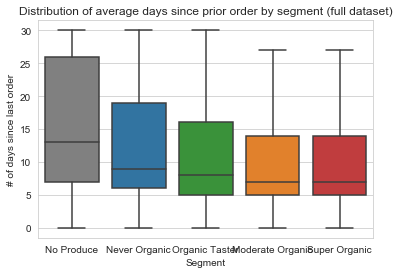

In [105]:
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'days_since_prior_order', data = c, 
            order=['No Produce', "Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of average days since prior order by segment (full dataset)")
plt.ylabel('# of days since last order')
plt.xlabel('Segment')
pass

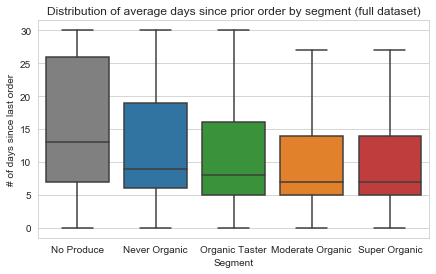

In [110]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'days_since_prior_order', data = c, 
            order=['No Produce', "Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of average days since prior order by segment (full dataset)")
plt.ylabel('# of days since last order')
plt.xlabel('Segment')
pass

# Build DF where each row is a user_id

In [25]:
# This returns a series with user_id, total items purchased
user_total_full = c.groupby('user_id')['item_purchased_flag'].sum()
user_total_full

user_id
1          70
2         226
3          88
4          18
5          46
         ... 
206205     51
206206    285
206207    223
206208    677
206209    137
Name: item_purchased_flag, Length: 206209, dtype: int64

In [26]:
# This returns a series with user_id, total of orders per user
user_orders_full = c.groupby('user_id')['order_id'].nunique()
user_orders_full

user_id
1         11
2         15
3         12
4          5
5          5
          ..
206205     4
206206    67
206207    16
206208    49
206209    14
Name: order_id, Length: 206209, dtype: int64

In [55]:
# This returns a series with user_id, Segmentation name
user_segment_full = c.groupby('user_id')[['segment']].first()
user_segment_full

,segment
user_id,
1,Moderate Organic
2,Organic Taster
3,Moderate Organic
4,Super Organic
5,Moderate Organic
...,...
206205,Moderate Organic
206206,Moderate Organic
206207,Super Organic


In [57]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
user_df_full_1 = pd.concat([user_total_full, user_orders_full], axis=1).reset_index()
user_df_full_1

,user_id,item_purchased_flag,order_id
0,1,70,11
1,2,226,15
2,3,88,12
3,4,18,5
4,5,46,5
...,...,...,...
206204,206205,51,4
206205,206206,285,67
206206,206207,223,16
206207,206208,677,49


In [58]:
# merge with customer segment df
user_df_full_2 = pd.merge(user_df_full_1, user_segment_full, how='left', left_on = 'user_id', right_on = 'user_id')
user_df_full_2

,user_id,item_purchased_flag,order_id,segment
0,1,70,11,Moderate Organic
1,2,226,15,Organic Taster
2,3,88,12,Moderate Organic
3,4,18,5,Super Organic
4,5,46,5,Moderate Organic
...,...,...,...,...
206204,206205,51,4,Moderate Organic
206205,206206,285,67,Moderate Organic
206206,206207,223,16,Super Organic
206207,206208,677,49,Moderate Organic


In [90]:
# Rename the oder_id column to total_produce_orders' & reordered to produce_items_reordered
user_df_full_2.rename(columns = {'order_id':'total_orders', 'item_purchased_flag' : 'total_items_purchased'}, inplace = True) 
user_df_full_2

,user_id,total_items_purchased,total_orders,segment,avg_order_size
0,1,70,11,Moderate Organic,6.363636
1,2,226,15,Organic Taster,15.066667
2,3,88,12,Moderate Organic,7.333333
3,4,18,5,Super Organic,3.600000
4,5,46,5,Moderate Organic,9.200000
...,...,...,...,...,...
206204,206205,51,4,Moderate Organic,12.750000
206205,206206,285,67,Moderate Organic,4.253731
206206,206207,223,16,Super Organic,13.937500
206207,206208,677,49,Moderate Organic,13.816327


In [91]:
user_df_full_2['avg_order_size'] = user_df_full_2['total_items_purchased']/user_df_full_2['total_orders']
user_df_full_2.round(2)

,user_id,total_items_purchased,total_orders,segment,avg_order_size
0,1,70,11,Moderate Organic,6.36
1,2,226,15,Organic Taster,15.07
2,3,88,12,Moderate Organic,7.33
3,4,18,5,Super Organic,3.60
4,5,46,5,Moderate Organic,9.20
...,...,...,...,...,...
206204,206205,51,4,Moderate Organic,12.75
206205,206206,285,67,Moderate Organic,4.25
206206,206207,223,16,Super Organic,13.94
206207,206208,677,49,Moderate Organic,13.82


In [92]:
df = user_df_full_2
df

,user_id,total_items_purchased,total_orders,segment,avg_order_size
0,1,70,11,Moderate Organic,6.363636
1,2,226,15,Organic Taster,15.066667
2,3,88,12,Moderate Organic,7.333333
3,4,18,5,Super Organic,3.600000
4,5,46,5,Moderate Organic,9.200000
...,...,...,...,...,...
206204,206205,51,4,Moderate Organic,12.750000
206205,206206,285,67,Moderate Organic,4.253731
206206,206207,223,16,Super Organic,13.937500
206207,206208,677,49,Moderate Organic,13.816327


In [93]:
# For one column using pandas: df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
df['segment'] = df['segment'].fillna('No Produce')
df

,user_id,total_items_purchased,total_orders,segment,avg_order_size
0,1,70,11,Moderate Organic,6.363636
1,2,226,15,Organic Taster,15.066667
2,3,88,12,Moderate Organic,7.333333
3,4,18,5,Super Organic,3.600000
4,5,46,5,Moderate Organic,9.200000
...,...,...,...,...,...
206204,206205,51,4,Moderate Organic,12.750000
206205,206206,285,67,Moderate Organic,4.253731
206206,206207,223,16,Super Organic,13.937500
206207,206208,677,49,Moderate Organic,13.816327


# Plot other box plot for Order # and Avg Order size per customer

Text(0.5, 0, 'Segment')

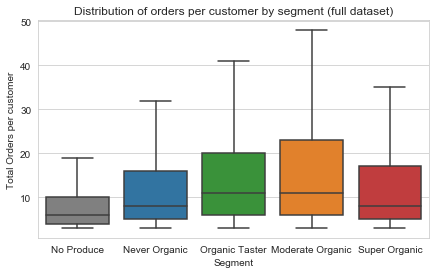

In [111]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'total_orders', data = df, 
            order=["No Produce" , "Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of orders per customer by segment (full dataset)")
plt.ylabel('Total Orders per customer')
plt.xlabel('Segment')

Text(0.5, 0, 'Segment')

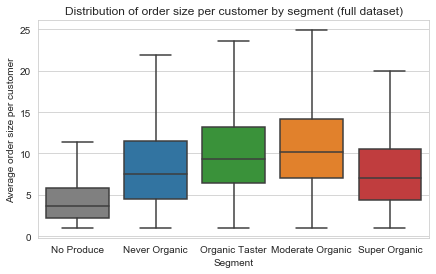

In [112]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.set_style("whitegrid")
sns.boxplot(x = 'segment', y = 'avg_order_size', data = df, 
            order=["No Produce" , "Never Organic", "Organic Taster", "Moderate Organic", 'Super Organic'], palette=my_pal, showfliers = False)
plt.title("Distribution of order size per customer by segment (full dataset)")
plt.ylabel('Average order size per customer')
plt.xlabel('Segment')